In [1]:
from datetime import datetime
from decouple import config
import numpy as np
from os import path
import pandas as pd
import praw
from profanity_filter import remove_bad_words
from PIL import Image
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# connecting to reddit API
reddit = praw.Reddit(
    client_id = config("CLIENT_ID"),
    client_secret = config("SECRET"),
    user_agent = config("USER"),
    username = config("USERNAME"),
    password = config("PASSWORD")
)

subreddit = reddit.subreddit("wallstreetbets")

hot_wsb = subreddit.hot(limit=1000)

Version 7.1.2 of praw is outdated. Version 7.1.4 was released 1 day ago.


In [3]:
# storing data in a pandas dataframe
dict = {"title": [],
        "subreddit": [],
        "score": [],
        "id": [],
        "url": [],
        "comms_num": [],
        "created": [],
        "body": []}

for submission in hot_wsb:
    dict["title"].append(submission.title)
    dict['subreddit'].append(submission.subreddit)
    dict["score"].append(submission.score)
    dict["id"].append(submission.id)
    dict["url"].append(submission.url)
    dict["comms_num"].append(submission.num_comments)
    dict["created"].append(submission.created)
    dict["body"].append(submission.selftext)
    
df = pd.DataFrame(dict)

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [4]:
# function that cleans the text in the submission
def clean_submission(text):
    text = text.lower()
    text = ' '.join(
        re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t'])|(\w+:\/\/\S+)", " ", text).split())
    return text

In [5]:
# applying clean submission function to the title and body columns
df['title'] = df['title'].apply(lambda x: clean_submission(x))
df['body'] = df['body'].apply(lambda x: clean_submission(x))

body_text = " ".join(body for body in df.body)
# combining title and body text
title_text = " ".join(title for title in df.title) + body_text

# set stop words/letters
stopwords = set(STOPWORDS)
stopwords.add("I'm, It's, s, m")

print(df.shape)
df.head()

(191, 8)


,title,subreddit,score,id,url,comms_num,created,body
0,daily discussion thread for february 09 2021,wallstreetbets,1249,lg0h70,https://www.reddit.com/r/wallstreetbets/commen...,30922,1.612897e+09,your daily trading discussion thread please ke...
1,gme 2 9,wallstreetbets,11201,lg0mn2,https://www.reddit.com/r/wallstreetbets/commen...,23948,1.612898e+09,is this still a thing
2,weed about to make me a millionaire in 2021,wallstreetbets,48640,lg57r6,https://i.redd.it/2hvrl2i5wgg61.jpg,4039,1.612912e+09,
3,wsb gme infinity war,wallstreetbets,48982,lg2vu8,https://v.redd.it/h02i6340agg61,1636,1.612905e+09,
4,kevin o'leary is making a 10k yolo,wallstreetbets,26841,lg49ff,https://i.redd.it/d7x5dh6qngg61.png,1782,1.612909e+09,


In [6]:
# applying profanity filter to text
title_text = remove_bad_words(title_text)

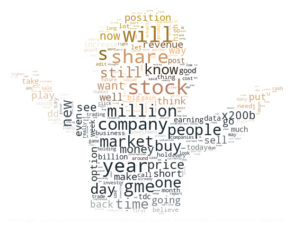

<Figure size 720x720 with 0 Axes>

In [8]:
# create visualiation
mask = np.array(Image.open("wallstreetbets3.png"))

wc = WordCloud(background_color="white", max_words=4000, mask=mask,
               stopwords=stopwords, max_font_size=40, random_state=42)

# generate word cloud
wc.generate(title_text)

# create coloring from image
image_colors=ImageColorGenerator(mask)

# show
plt.imshow(wc.recolor(
    color_func=image_colors), interpolation = "bilinear")
plt.axis('off')
plt.figure(figsize=(10, 10))

# save
time = datetime.now().strftime("%m/%d/%Y %H:%M:%S")
time = time.replace("/", "-")
wc.to_file(f"wordcloud {time}.png")